## K-Means - Machine temperature failure Dataset (NAB)
Prima di utilizzare questo script, bisogna caricare il file csv dei dati [machine_temperature_system_failure.csv](https://drive.google.com/file/d/1-P2RkOALR9EF2oqA4D8jdlVxVaqtGdej/view?usp=sharing).

### Anomalie
Ci sono 3 anomalie nel dataset caricato:
* 2 anomalie spaziali
* 1 anomalia temporale

In [13]:
# Import delle librerie necessarie
from sklearn.cluster import KMeans
from numpy import sqrt, random, array, argsort
from sklearn.preprocessing import scale
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Costanti
DATASET_PATH = 'machine_temperature_system_failure.csv'

In [15]:
# Caricamento dataset
temperatures = pd.read_csv(DATASET_PATH)
temperatures.head()

,timestamp,value
0,2013-12-02 21:15:00,73.967322
1,2013-12-02 21:20:00,74.935882
2,2013-12-02 21:25:00,76.124162
3,2013-12-02 21:30:00,78.140707
4,2013-12-02 21:35:00,79.329836


In [16]:
# Recupero array di valori dei dati
dataset = np.array(temperatures['value'])
dataset

array([73.96732207, 74.935882  , 76.12416182, ..., 97.13546835,
       98.05685212, 96.90386085])

## Analisi dei dati con K-Means

In [17]:
# Utilizzo K-Means con 1 cluster

# I dati prima vengono scalati
dataset_scaled = dataset.reshape(-1, 1)

kmeans = KMeans(n_clusters=1).fit(dataset_scaled)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
# Recupero del centroide del cluster
center = kmeans.cluster_centers_
center

array([[85.92649821]])

In [19]:
# Per ogni dati, calcolo distanza dal centroide
distances = sqrt((dataset_scaled - center)**2)
distances

array([[11.95917614],
       [10.99061621],
       [ 9.80233639],
       ...,
       [11.20897014],
       [12.13035391],
       [10.97736264]])

In [27]:
# Ordino i valori delle distanze in ordine decrescente ed estraggo i primi 5
order_index = argsort(distances, axis=0)
#indexes = order_index[-10:]
#indexes = order_index[-20:]
#indexes = order_index[-50:]
indexes = order_index[-3:]
# Indici dei valori delle anomalie
indexes

array([[3984],
       [3985],
       [3986]])

In [28]:
# Preparazione dati per il plot
timestamps = np.array(temperatures['timestamp'])
values = np.array(temperatures['value'])

anomaly_timestamps = timestamps[indexes]
anomaly_values = values[indexes]
anomaly_timestamps

array([['2013-12-16 17:15:00'],
       ['2013-12-16 17:20:00'],
       ['2013-12-16 17:25:00']], dtype=object)

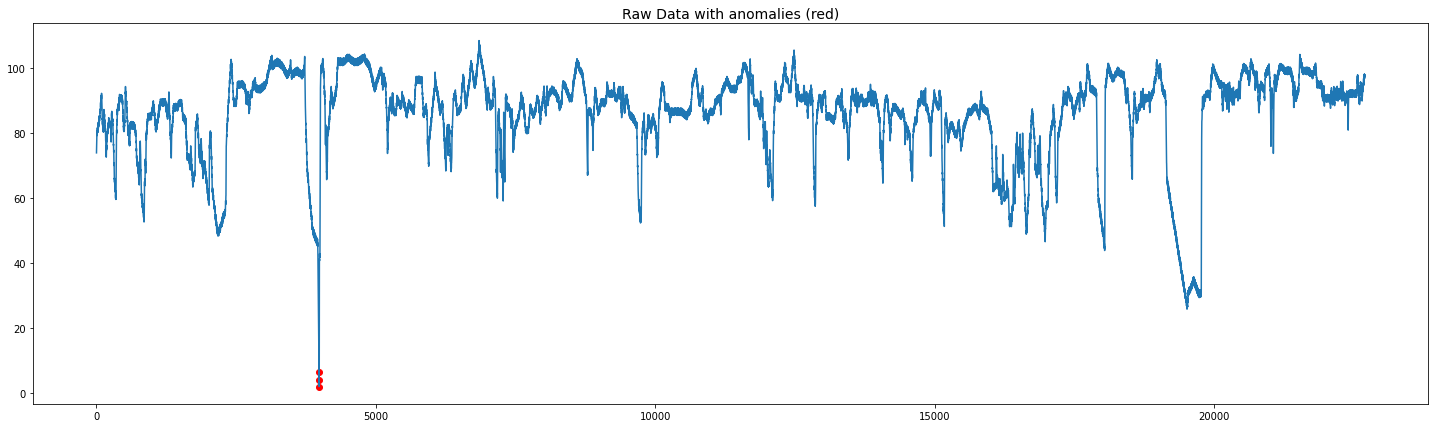

In [29]:
# Plot dei dati con anomalie
fig, axes = plt.subplots(1,1, sharex=True, figsize=(25,7))
axes.plot(np.arange(len(values)), values)
axes.scatter(indexes, anomaly_values, color='r')
axes.set_title('Raw Data with anomalies (red)', size=14)

plt.show()

In [30]:
temp_plot = pd.read_csv(DATASET_PATH, index_col=0)
temp_plot.index = pd.to_datetime(temp_plot.index)

# Creazione eventi anomali
events = {
  'spatial1'     : ('2013-12-15 12:00:00',
                    '2013-12-17 00:00:00'),
  'temporal1'    : ('2014-02-02 12:00:00',
                    '2014-02-04 00:00:00'),
  'spatial2'     : ('2014-02-07 00:00:00',
                    '2014-02-10 00:00:00'),
}
temp_plot['event'] = np.zeros(len(temp_plot))
for event, duration in events.items():
    start, end = duration
    temp_plot.loc[start:end, 'event'] = 1

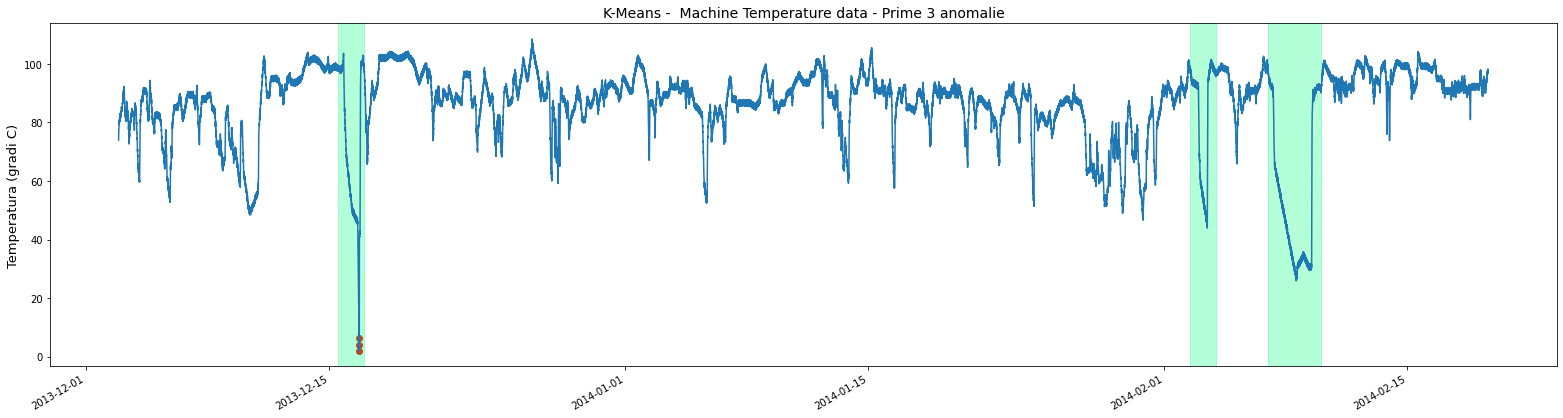

In [32]:
fig, ax = plt.subplots(1, figsize=(27, 7))
temp_plot['value'].plot(ax=ax)

ax.scatter(anomaly_timestamps, anomaly_values, color='red')

for event, duration in events.items():
    start, end = duration
    ax.axvspan(start, end, alpha=0.3,
                  color='springgreen')

ax.set_xlabel('')

ax.set_ylabel('Temperatura (gradi C)', size=13)
ax.set_title('K-Means -  Machine Temperature data - Prime 3 anomalie',
                size=14)

fig.savefig('KM_Temperature_3_Anomaly.png')
plt.show()